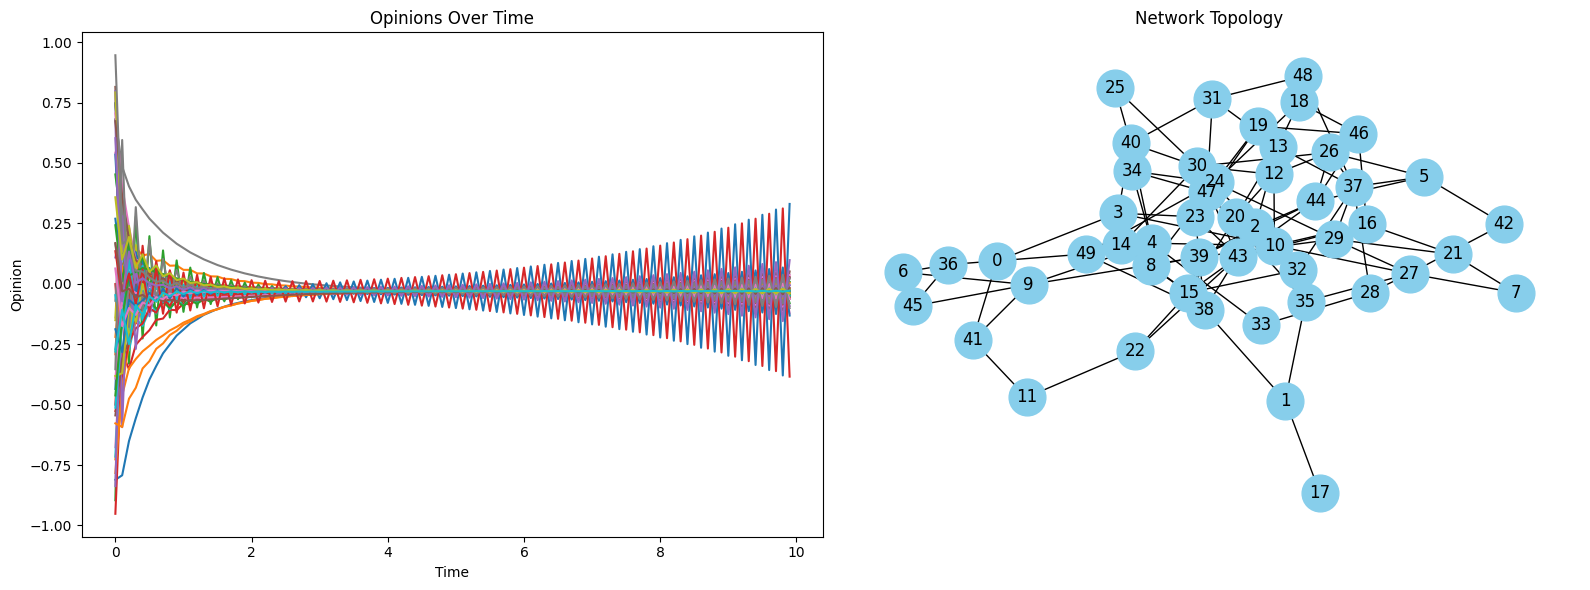

In [157]:
# Importing necessary libraries for the 'Distributed Consensus in OND' notebook
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the distributed consensus model
N_nodes = 50  # Number of nodes in the network
alpha = 0.2  # Rate of opinion update

# Generate a random graph to represent the network
G = nx.erdos_renyi_graph(N_nodes, 0.1)
adj_matrix = nx.adjacency_matrix(G).toarray()

# Initial opinions (states) for each node
initial_opinions = np.random.uniform(-1, 1, N_nodes)

# Time parameters for simulation
dt_consensus = 0.1
total_time_consensus = 10.0
time_steps_consensus = int(total_time_consensus / dt_consensus)

# Store the opinions at each time step
opinions_over_time = np.zeros((time_steps_consensus, N_nodes))

# Initial state
opinions_over_time[0, :] = initial_opinions

# Function to update the opinions based on neighbors
def update_opinions(opinions, alpha, adj_matrix):
    delta_opinions = np.dot(adj_matrix, opinions) - np.sum(adj_matrix, axis=1) * opinions
    return opinions + alpha * delta_opinions

# Simulate the opinion dynamics over time
for t in range(1, time_steps_consensus):
    opinions_t = opinions_over_time[t-1, :]
    opinions_over_time[t, :] = update_opinions(opinions_t, alpha, adj_matrix)

# Plotting the results
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, total_time_consensus, dt_consensus), opinions_over_time)
plt.title('Opinions Over Time')
plt.xlabel('Time')
plt.ylabel('Opinion')

plt.subplot(1, 2, 2)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, font_size=12)
plt.title('Network Topology')

plt.tight_layout()
plt.show()
